In [1]:
!pip install git+http://github.com/GiulioRossetti/ndlib.git
!pip install bokeh==1.3.0
!pip install ndlib
!pip install networkx

/bin/sh: pip: command not found
/bin/sh: pip: command not found
/bin/sh: pip: command not found
/bin/sh: pip: command not found


In [2]:
# install dependencies
!npm install

/bin/sh: npm: command not found


# Creating a Barabasi-Albert Network

In [1]:
%matplotlib inline
import networkx as nx 
import numpy as np       # very useful library for operations with matrices
import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.ModelConfig as mc
import matplotlib.pyplot as plt
import pandas as pd


=========Section Complete.=========



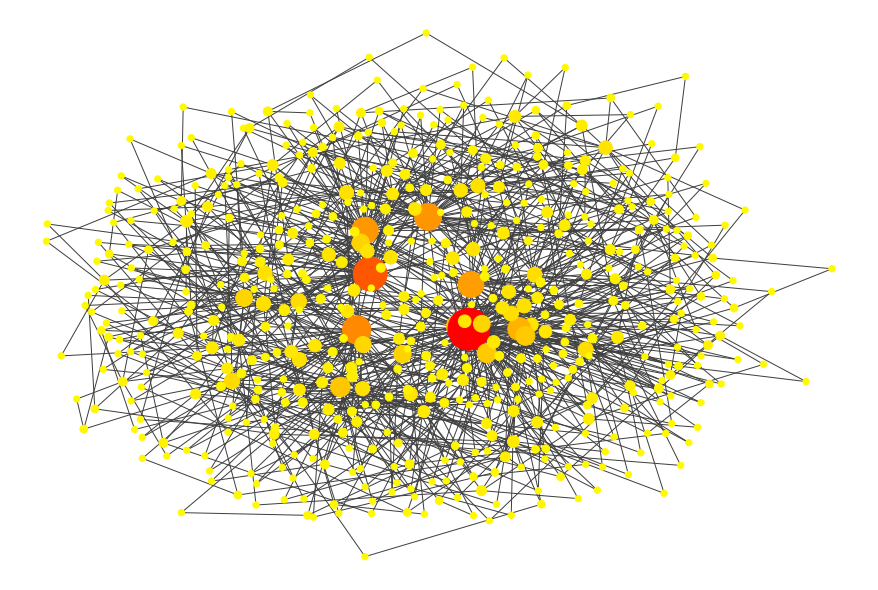

In [3]:
# Network defination
n = 560000  #Usually we set this as 200~500 for visualisation.
m = 2
G_barabasi =nx.barabasi_albert_graph(n,m)

#Alter Size based on its degree (The size is directly proportional to its degrees)
size_map = []
Degree_List=list(G_barabasi.degree)
Max_Degree=0

for Degree in Degree_List:
    size_of_node = Degree[1] * 20
    size_map.append(size_of_node)
    Max_Degree=max(Degree[1],Max_Degree)

#Alter the colour of the nodes (the more no. of degrees, the more reddish the nodes)
color_map = []
for Degree in Degree_List:
    tinge = 255 - Degree[1] / Max_Degree * 255
    hexa_value = hex(int(tinge))
    if len(hexa_value)<=3:
        hexa_value="0"+hexa_value[-1]
    else:
        hexa_value=hexa_value[-2:]
    hexa_value = "#ff"+hexa_value+"00"
    color_map.append(hexa_value)

"""# Plot graph
plt.figure(figsize=(12,8))
nx.draw_kamada_kawai(G_barabasi, node_color=color_map, node_size=size_map, edge_color='#404040')
"""
# Model selection
model = sir(G_barabasi)

print("\n=========Section Complete.=========\n")

**Display Network Property**

Not advised if your network number > 50,000

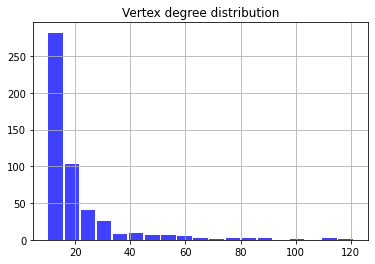

|V| = 500
|E| = 4900
Average degree is 19.6
CC = 0.09991803940392391
Transitivity = 0.09052491396474202

=========Section Complete.=========



In [3]:
#Display the relevant information of the Barabasi Albert Network above:
def print_network_chars(G_barabasi):
    vertex_degrees = list(dict(nx.degree(G_barabasi)).values())
    plt.hist(vertex_degrees, 
         bins = np.linspace(np.min(vertex_degrees),
                          1 + np.max(vertex_degrees), 20),
         facecolor='blue', alpha=0.75, rwidth = 0.9) 
    plt.title("Vertex degree distribution",color='black')
    plt.grid(True)
    plt.show()
    n = nx.number_of_nodes(G_barabasi)
    m = nx.number_of_edges(G_barabasi)
    CC = nx.average_clustering(G_barabasi)
    Trans = nx.transitivity(G_barabasi)
    print("|V| =", n)
    print("|E| =", m)
    print("Average degree is", 2 * m / n)
    print("CC =", CC)
    print("Transitivity =", Trans)
    return None

print_network_chars(G_barabasi)
print("\n=========Section Complete.=========\n")

# **SIR simulation**

**Simulation without change in parameter values**

In [3]:
from random import randint
import time

a=time.time()
#==========Initialization============
beta=0.124600645991878/6   #Infection Rate / 2m
gamma=0.0301170506124948   #Recovery Rate
Num_Iteration=100     #Number of iterations (days)
Incubation_Period=14    #Guarantee that for the first 14 days, no one will recover.

#The following arrays stores the number in each of the S,I,R cases in each day.
Susceptible=[n-1]
Infected=[1]
Removed=[0]      #Removed is defined as recovered, dead, or quarantined in perfect isolation  

#Node_Status denotes the status of each node.
#{'Susceptible': 0, 'Infected': 1, 'Removed': 2}
Node_Status=[0]*n        #Initialize every node to be susceptible.
pick_one = randint(0,n)     #Select 1 random node to be infected.
Node_Status[pick_one] = 1

#==========Just to prevent aliasing effect when quating arrays========
def AssignArray(A):
    B=[]
    for i in range(len(A)):
        B.append(A[i])
    return B

#============Main Programme: Iterations=============
for i in range(Num_Iteration):
    New_Node_Status = AssignArray(Node_Status)
    print("[",i,end=" ")
    print(Node_Status.count(1),"]",end=" ")
    
    for this_node in range(n):
        
        #If this_node is already infected, perform the following
        if Node_Status[this_node]==1:
            #Extract the list of neighbours of a given vertex that is already infected.
            neig_list = np.array(list(G_barabasi.neighbors(this_node))) 

            #We will then pick beta*100 of the nodes from its neighbour
            pick_these = np.random.rand(neig_list.size) < beta
            
            #Infect the selected nodes by changing their New_Node_Status
            for Node in neig_list[pick_these]:
                if New_Node_Status[Node]==0:
                    New_Node_Status[Node]=1
                    
            #This infected node may have a gamma chance of recovery
            if i>=Incubation_Period and randint(1,10000)<=gamma*10000:
                New_Node_Status[this_node]=2
        
    Node_Status = AssignArray(New_Node_Status)
    Susceptible.append(Node_Status.count(0))
    Infected.append(Node_Status.count(1))
    Removed.append(Node_Status.count(2))
    
#======Display Result=========
print()
print(Susceptible)
print(Infected)
print(Removed)
b=time.time()
print("\nRuntime:",b-a,"seconds")

[ 0 1 ] [ 1 1 ] [ 2 1 ] [ 3 1 ] [ 4 2 ] [ 5 3 ] [ 6 4 ] [ 7 6 ] [ 8 8 ] [ 9 10 ] [ 10 11 ] [ 11 12 ] [ 12 16 ] [ 13 17 ] [ 14 19 ] [ 15 23 ] [ 16 25 ] [ 17 30 ] [ 18 33 ] [ 19 35 ] [ 20 39 ] [ 21 43 ] [ 22 51 ] [ 23 64 ] [ 24 81 ] [ 25 103 ] [ 26 133 ] [ 27 175 ] [ 28 225 ] [ 29 290 ] [ 30 353 ] [ 31 441 ] [ 32 522 ] [ 33 676 ] [ 34 910 ] [ 35 1214 ] [ 36 1646 ] [ 37 2155 ] [ 38 2756 ] [ 39 3546 ] [ 40 4499 ] [ 41 5739 ] [ 42 7263 ] [ 43 9057 ] [ 44 11155 ] [ 45 13591 ] [ 46 16290 ] [ 47 19492 ] [ 48 23134 ] [ 49 26992 ] [ 50 31207 ] [ 51 35856 ] [ 52 40820 ] [ 53 46175 ] [ 54 51904 ] [ 55 57918 ] [ 56 63946 ] [ 57 70189 ] [ 58 76590 ] [ 59 83330 ] [ 60 89931 ] [ 61 96389 ] [ 62 102871 ] [ 63 109364 ] [ 64 115396 ] [ 65 121398 ] [ 66 127231 ] [ 67 132624 ] [ 68 137836 ] [ 69 142984 ] [ 70 147671 ] [ 71 152048 ] [ 72 155851 ] [ 73 159486 ] [ 74 162720 ] [ 75 165681 ] [ 76 168074 ] [ 77 170256 ] [ 78 172095 ] [ 79 173681 ] [ 80 174940 ] [ 81 175987 ] [ 82 176909 ] [ 83 177483 ] [ 84 1778

**Simulation with change in parameter values (beta & gamma)**

In [195]:
from random import randint
import time

a=time.time()
#==========Initialization============
#Yb (beta) stores Infection rates in different phases; Yg (gamma) stores Recovery rates
Yb=[0.124600645991878,0.0996865773425101,0.0354253325563928,0.028876053566773,0.0520287244977815]
Yg=[0.0301170506124948,0.00578471878195159,0.0475046220763542,0.0616736954350334,0.0697440723670661]
X=[82,107,136,154,341]
for i in range(len(Yb)):
    Yb[i]=Yb[i]/4

Num_Iteration=300     #Number of iterations (days)
Incubation_Period=14    #Guarantee that for the first 14 days, no one will recover.

#The following arrays stores the number in each of the S,I,R cases in each day.
Susceptible=[n-1]*60
Infected=[1]*60
Removed=[0]*60      #Removed is defined as recovered, dead, or quarantined in perfect isolation  

#Node_Status denotes the status of each node.
#{'Susceptible': 0, 'Infected': 1, 'Removed': 2}
Node_Status=[0]*n        #Initialize every node to be susceptible.
for i in range(10):
    pick_one = randint(0,n)     #Select 10 random node to be infected initially.
    Node_Status[pick_one] = 1

#==========Just to prevent aliasing effect when quating arrays========
def AssignArray(A):
    B=[]
    for i in range(len(A)):
        B.append(A[i])
    return B

def UpdateParameters(x):
    phase=0
    for i in range(len(X)):
        if x < X[i]:
            break
        else:
            phase+=1
    if phase==0:
        return Yb[0], Yg[0]
    elif phase==len(X):
        return Yb[phase-1],Yg[phase-1]
    else:
        beta=(Yb[phase]-Yb[phase-1])*(x-X[phase-1])/(X[phase]-X[phase-1])+Yb[phase-1]
        gamma=(Yg[phase]-Yg[phase-1])*(x-X[phase-1])/(X[phase]-X[phase-1])+Yg[phase-1]
    return beta, gamma

#============Main Programme: Iterations=============
for i in range(Num_Iteration):
    New_Node_Status = AssignArray(Node_Status)
    print("[",i,end=" ")
    print(Node_Status.count(1),"]",end=" ")
    
    #Update the parameters to allow them vary linearly between stages
    beta, gamma = UpdateParameters(i+54)
    
    for this_node in range(n):
        
        #If this_node is already infected, perform the following
        if Node_Status[this_node]==1:
            #Extract the list of neighbours of a given vertex that is already infected.
            neig_list = np.array(list(G_barabasi.neighbors(this_node))) 

            #We will then pick beta*100% of the nodes from its neighbour
            pick_these = np.random.rand(neig_list.size)*100000 < beta*100000
            
            #Infect the selected nodes by changing their New_Node_Status
            for Node in neig_list[pick_these]:
                if New_Node_Status[Node]==0:
                    New_Node_Status[Node]=1
                    
            #This infected node may have a gamma chance of recovery
            if i>=Incubation_Period and randint(1,100000)<=gamma*100000:
                New_Node_Status[this_node]=2
        
    Node_Status = AssignArray(New_Node_Status)
    Susceptible.append(Node_Status.count(0))
    Infected.append(Node_Status.count(1))
    Removed.append(Node_Status.count(2))
    
#======Display Result=========
print()
print(Susceptible)
print(Infected)
print(Removed)
b=time.time()
print("\nRuntime:",b-a,"seconds")

[ 0 10 ] [ 1 10 ] [ 2 10 ] [ 3 14 ] [ 4 15 ] [ 5 15 ] [ 6 20 ] [ 7 21 ] [ 8 22 ] [ 9 27 ] [ 10 28 ] [ 11 29 ] [ 12 33 ] [ 13 47 ] [ 14 68 ] [ 15 79 ] [ 16 111 ] [ 17 153 ] [ 18 215 ] [ 19 268 ] [ 20 335 ] [ 21 416 ] [ 22 507 ] [ 23 626 ] [ 24 747 ] [ 25 894 ] [ 26 1064 ] [ 27 1250 ] [ 28 1470 ] [ 29 1798 ] [ 30 2204 ] [ 31 2643 ] [ 32 3102 ] [ 33 3612 ] [ 34 4223 ] [ 35 4857 ] [ 36 5515 ] [ 37 6198 ] [ 38 6916 ] [ 39 7646 ] [ 40 8430 ] [ 41 9140 ] [ 42 9878 ] [ 43 10546 ] [ 44 11196 ] [ 45 11826 ] [ 46 12382 ] [ 47 12916 ] [ 48 13263 ] [ 49 13600 ] [ 50 13973 ] [ 51 14194 ] [ 52 14364 ] [ 53 14460 ] [ 54 14536 ] [ 55 14618 ] [ 56 14656 ] [ 57 14661 ] [ 58 14616 ] [ 59 14583 ] [ 60 14573 ] [ 61 14326 ] [ 62 14192 ] [ 63 14030 ] [ 64 13885 ] [ 65 13660 ] [ 66 13422 ] [ 67 13201 ] [ 68 12968 ] [ 69 12715 ] [ 70 12532 ] [ 71 12256 ] [ 72 11898 ] [ 73 11661 ] [ 74 11430 ] [ 75 11160 ] [ 76 10922 ] [ 77 10662 ] [ 78 10391 ] [ 79 10137 ] [ 80 9890 ] [ 81 9687 ] [ 82 9541 ] [ 83 9319 ] [ 84 90

**Displaying results**

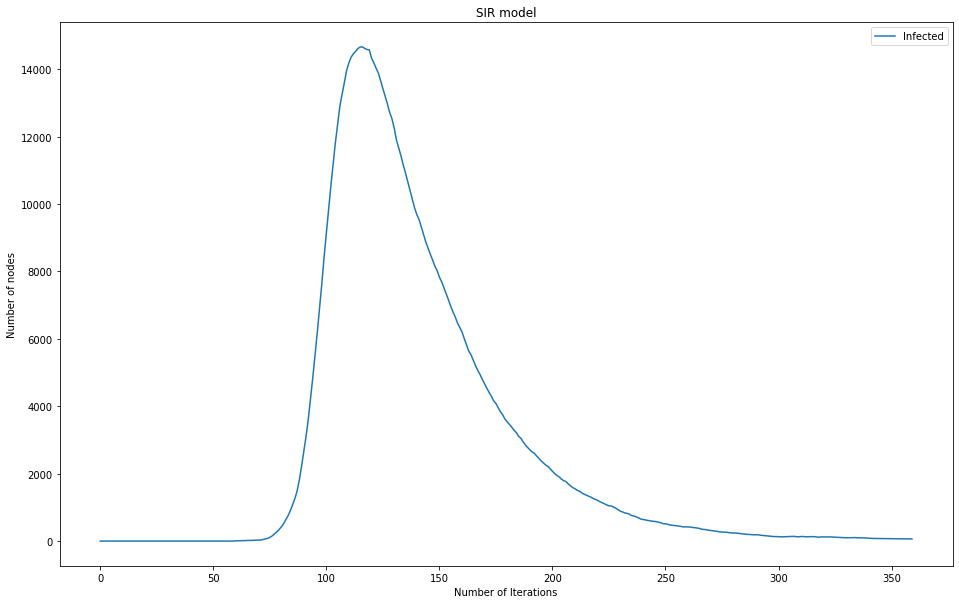

In [196]:
#Plot the graphs of S,I,R based on the above simulation
Days=[]
for i in range(Num_Iteration+60):
    Days.append(i)

plt.figure(figsize=(16,10))
plt.plot(Days, Susceptible, label = "Susceptible")
plt.plot(Days, Infected, label = "Infected")
plt.plot(Days, Removed, label = "Removed")
plt.xlabel('Number of Iterations')
plt.ylabel('Number of nodes')
plt.title('SIR model')
plt.legend()
plt.show()

In [197]:
df = pd.DataFrame({
    'day': Days,
    'suseptible': Susceptible,
    'infected': Infected,
    'recovered': Removed
})

writer = pd.ExcelWriter('Network Model Data.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='BA network Simulation', index=False)
writer.save()

**Please ignore the codes from this point onwards**

In [96]:
#Enhanced efficiency (Badly done)
from random import randint

#==========Initialization============
beta=0.02   #Infection Rate
gamma=0.02  #Recovery Rate
Num_Iteration=200     #Number of iterations (days)
Incubation_Period=14    #Guarantee that for the first 14 days, no one will recover.

#The following arrays stores the number in each of the S,I,R cases in each day.
Susceptible=[n-1]
Infected=[1]
Removed=[0]      #Removed is defined as recovered, dead, or quarantined in perfect isolation  

#Node_Status denotes the status of each node.
#{'Susceptible': 0, 'Infected': 1, 'Removed': 2}
Node_Status=[0]*n        #Initialize every node to be susceptible.
pick_one = randint(0,n)     #Select 1 random node to be infected.
Node_Status[pick_one] = 1
Infected_Nodes=[pick_one]

#==========Just to prevent aliasing effect of equating arrays========
def AssignArray(A):
    B=[]
    for i in range(len(A)):
        B.append(A[i])
    return B

#============Main Programme: Iterations=============
for i in range(Num_Iteration):
    New_Node_Status = AssignArray(Node_Status)
    NewlyInfected=[]
    print(i,end=" ")

    for this_node in Infected_Nodes:
        #Extract the list of neighbours of a given vertex that is already infected.
        neig_list = np.array(list(G_barabasi.neighbors(this_node))) 

        #We will then pick beta*100 of the nodes from its neighbour
        pick_these = np.random.rand(neig_list.size) < beta
            
        #Infect the selected nodes by changing their New_Node_Status
        for Node in neig_list[pick_these]:
            if New_Node_Status[Node]==0:
                New_Node_Status[Node]=1
                NewlyInfected.append(Node)
                    
        #This infected node may have a gamma chance of recovery
        if i>=Incubation_Period and randint(1,100)<=gamma*100:
            New_Node_Status[this_node]=2
            Infected_Nodes.remove(this_node)
        
    Node_Status = AssignArray(New_Node_Status)
    Infected_Nodes = Infected_Nodes + NewlyInfected
    Susceptible.append(Node_Status.count(0))
    Infected.append(Node_Status.count(1))
    Removed.append(Node_Status.count(2))
    
#======Display Result=========
print()
print(Susceptible)
print(Infected)
print(Removed)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 
[49999, 49999, 49999, 49999, 49999, 49999, 49999, 49999, 49999, 49999, 49999, 49999, 49999, 49998, 49998, 49998, 49998, 49998, 49998, 49998, 49998, 49997, 49988, 49981, 49973, 49965, 49950, 49937, 49926, 49902, 49874, 49836, 49789, 49716, 49607, 49472, 49322, 49148, 48940, 48708, 48417, 48095, 47721, 47281, 

**Original codes**

In [19]:
import ndlib.models.ModelConfig as mc

# Set model configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.12449368280623056) #infection rate
config.add_model_parameter('gamma', 0.029903253299441525) #recovery rate
config.add_model_parameter("percentage_infected", 0.000001)
model.set_initial_status(config)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ndlib/models/DiffusionModel.py:169: UserWarning: The fraction_infected value is too low given the number of nodes of the selected graph: a single node will be set as infected
  warnings.warn(


In [17]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

The model configuration above allows to specify the model parameters. The initial fraction of infected nodes is also defined by 'percentage_infected.'

In [22]:
# Simulation
iterations = model.iteration_bunch(100)
"""
Just to check the items in each iteration.
In node_count, 0=susceptible, 1=infected, 2=removed
This is also indicated by  model.available_statuses above
"""
for element in iterations:
    print(element)

trends = model.build_trends(iterations)


100%|██████████| 100/100 [02:51<00:00,  1.71s/it]

{'iteration': 107, 'status': {169: 2, 479: 2, 1275: 2, 2008: 2, 2126: 2, 2138: 2, 2568: 2, 3254: 2, 4393: 2, 4905: 2, 6135: 2, 6350: 2, 6532: 2, 6835: 2, 7365: 2, 7500: 2, 9335: 2, 11371: 2, 12664: 2, 13221: 2, 14374: 2, 15742: 2, 16131: 2, 16475: 2, 18446: 2, 20490: 2, 21311: 2, 22044: 2, 22264: 2, 22441: 2, 23148: 2, 23409: 2, 23627: 2, 23828: 2, 23965: 2, 24534: 2, 25079: 2, 25169: 2, 25954: 2, 27281: 2, 27585: 2, 27841: 2, 28005: 2, 28864: 2, 30208: 2, 30444: 2, 30549: 2, 30573: 2, 30631: 2, 30903: 2, 31094: 2, 31319: 2, 32400: 2, 33045: 2, 33046: 2, 33184: 2, 33598: 2, 36047: 2, 36184: 2, 37530: 2, 38198: 2, 40315: 2, 40376: 2, 40634: 2, 41134: 2, 41247: 2, 41750: 2, 42681: 2, 42824: 2, 42903: 2, 43072: 2, 43152: 2, 43589: 2, 43943: 2, 44242: 2, 44462: 2, 46901: 2, 48943: 2, 49625: 2, 50343: 2, 52003: 2, 52465: 2, 52554: 2, 53013: 2, 53031: 2, 53092: 2, 53534: 2, 54380: 2, 54906: 2, 54994: 2, 57292: 2, 57882: 2, 57937: 2, 58862: 2, 59853: 2, 61084: 2, 61744: 2, 61755: 2, 63200: 2,